# Learning Laplacian eigenfunctions in one dimension

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Load libraries
import logging

import matplotlib.pyplot as plt
import numpy as np

from klap import (
    ExponentialKernel,
    GaussianKernel,
    PolynomialKernel,
)

# Set logger
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s %(levelname)s %(message)s",
)

#### Generate data 

In [3]:
np.random.seed(100)
n = 10000
p = 500

# Learn Hermite polynomials
x = np.random.randn(n, 1) * np.sqrt(.1)
x_min, x_max = -1, 1
y_min, y_max = -4, 4

# # Learn Chebychev polynomials
# x = np.random.rand(n, 1) * 2 - 1
# x_min, x_max = -1, 1

#### Choose a kernel

In [4]:
# kernel = PolynomialKernel(d=6)
# kernel = ExponentialKernel(sigma=1)
kernel = GaussianKernel(sigma=1)

#### Fit eigenfunctions

In [5]:
help(kernel.fit)

Help on method fit in module klap.kernels.kernel_laplacian:

fit(x, p=None, k=None, L_reg: float = 0, R_reg: float = 0, inverse_L: bool = False) method of klap.kernels.gaussian_fast.FastGaussianKernel instance
    Estimate Laplacian operator based on data.
    
    Parameters
    ----------
    x: ndarray of size (n, d)
        Data matrix
    p: int (optional, default is None)
        Number of representer points to use
    k: int (optional, default is None)
        Number of eigenvalues to compute. If None, k will be taken as self.k (default is 16)
    L_reg: float (optional, default is 0)
        Regularization parameter for Laplacian matrix
    R_reg: float (optional, default is 0)
        Regularization parameter for Nystrom matrix
    inverse_L: bool (optional, default is False)
        Either to inverse L or R in the GEVD system.
    
    Returns
    -------
    lambdas: ndarray of size (k,)
        Eigenvalues of the Laplacian operator
    alphas: ndarray of size (p, k)
       

In [6]:
kernel.fit(x, p=p, k=16, L_reg=1e-4, R_reg=0)

2023-03-21 17:02:10,390 INFO Inversing R
2023-03-21 17:02:10,397 INFO Matrix is not sdp.
2023-03-21 17:02:10,397 INFO Setting regularizer to 3.7e-14


#### Get eigenfunctions / features map

In [7]:
x_test = np.linspace(x_min, x_max, num=1000)
phi = kernel(x_test[:, np.newaxis])

#### Plot eigenfunctions

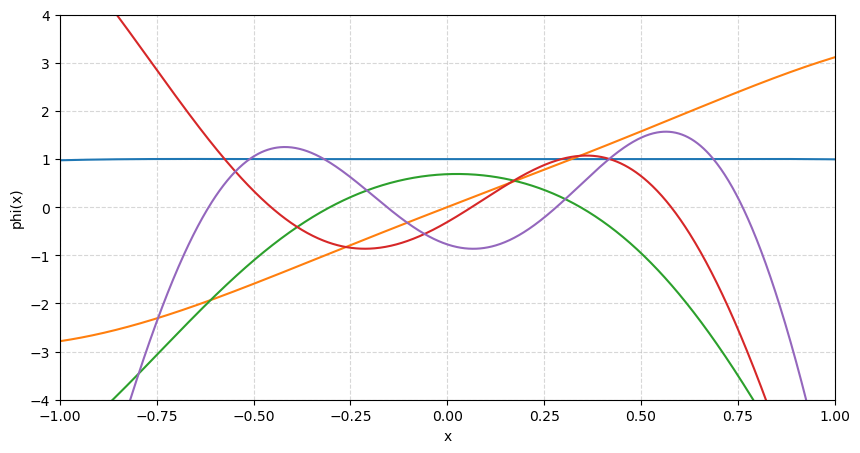

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x_test, phi[:,:5])
ax.set_xlabel("x")
ax.set_ylabel("phi(x)")
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.grid(True, linestyle="--", alpha=.5)

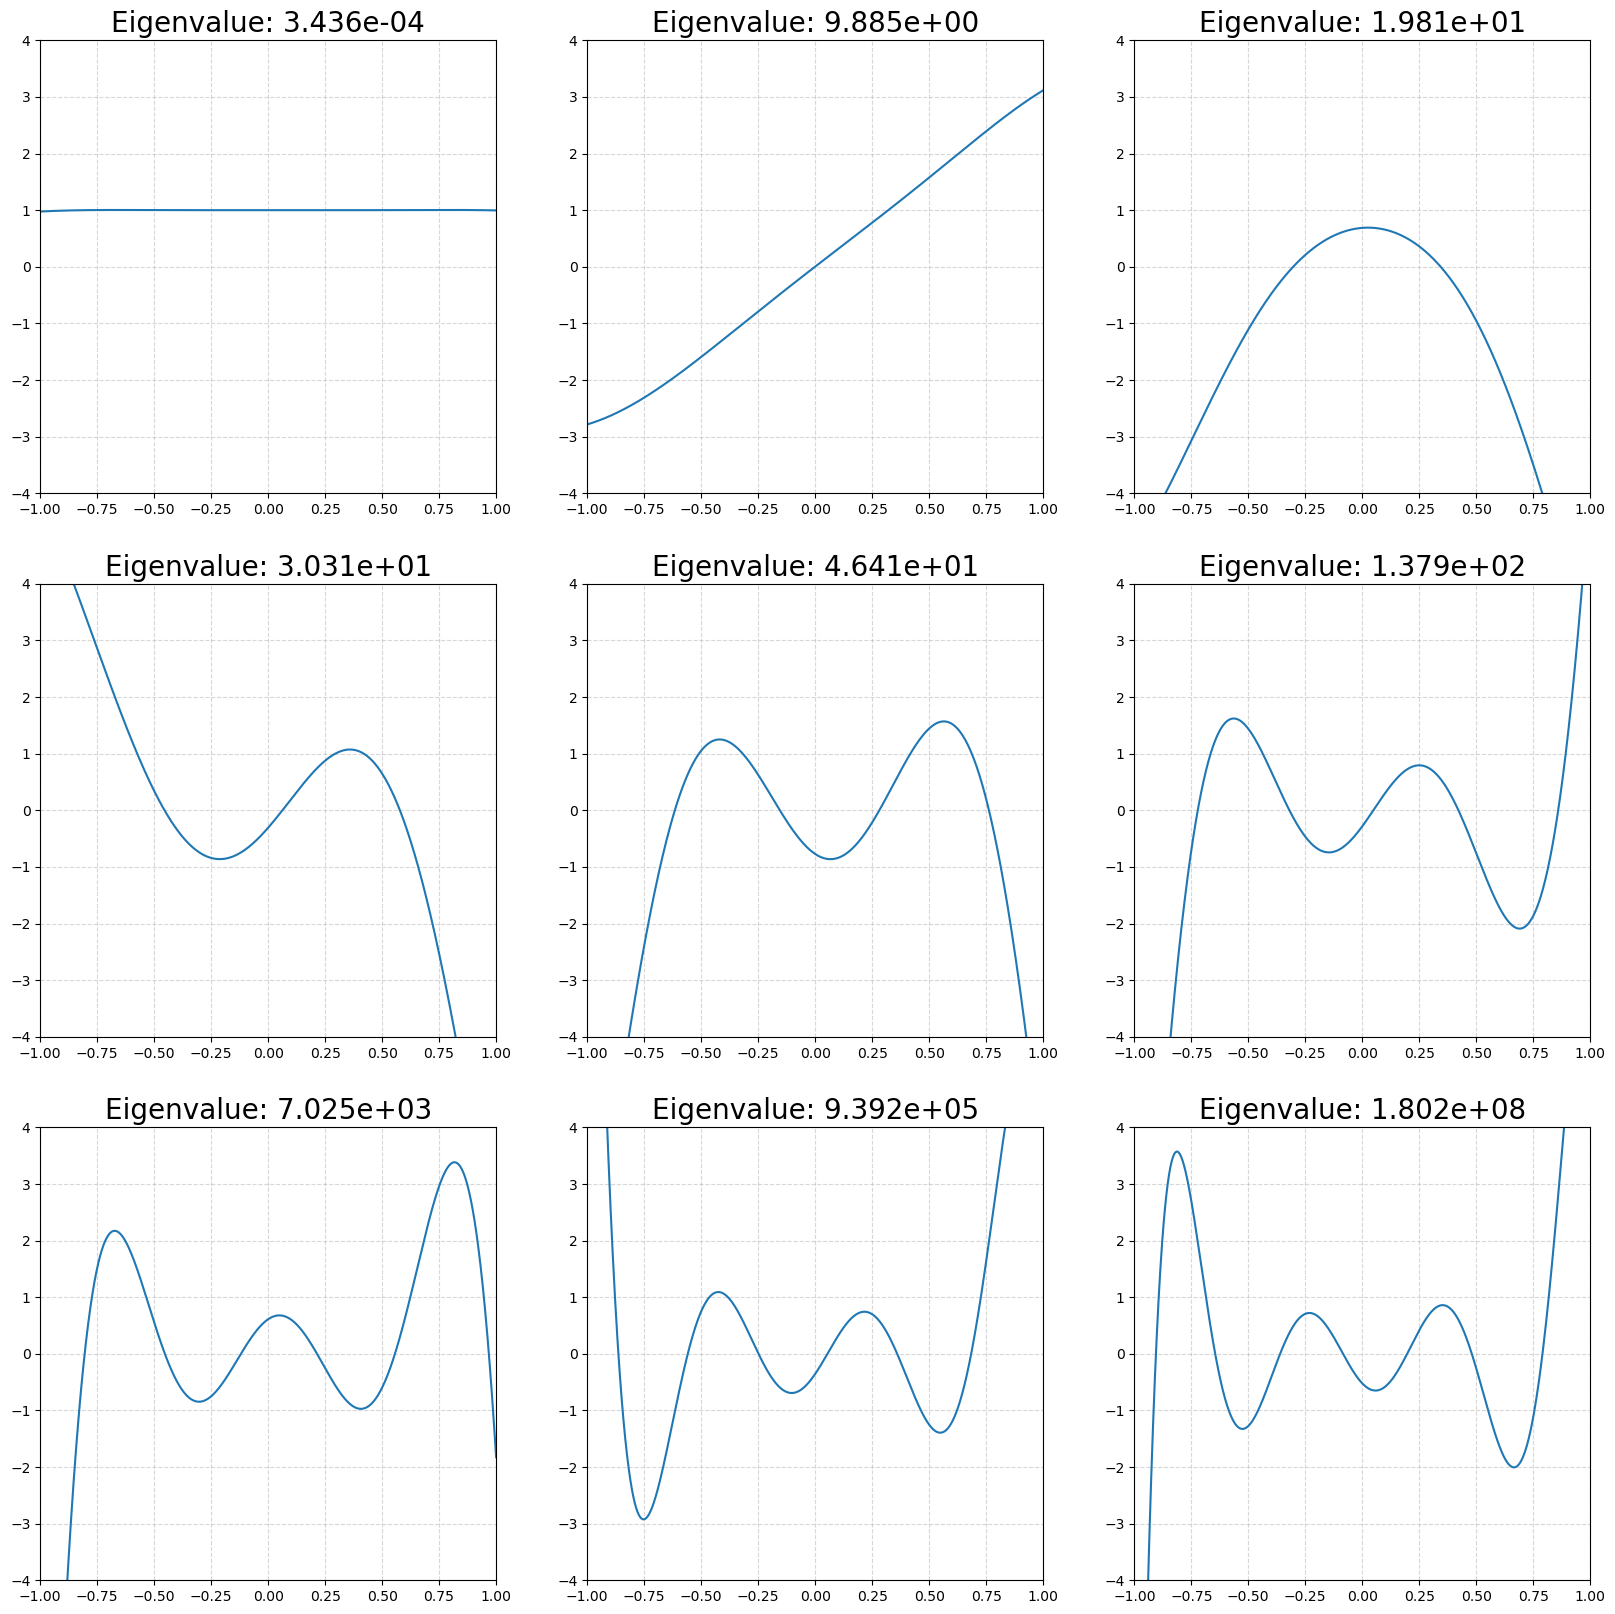

In [9]:
num = 3
fig, axes = plt.subplots(num, num, figsize=(20, 20))
for i in range(num**2):
    axes[i//num, i%num].plot(x_test, phi[:, i], color='C0')
    axes[i//num, i%num].grid(True, linestyle='--', alpha=.5)
    axes[i//num, i%num].set_xlim(x_min, x_max)
    axes[i//num, i%num].set_ylim(y_min, y_max)
    axes[i//num, i%num].set_title(f"Eigenvalue: {kernel.eigenvalues[i]:.3e}", fontsize=20)